In [2]:
from queue import PriorityQueue

def dijkstra(graph, start, end):
    queue = PriorityQueue()
    queue.put((0, start))
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0
    paths = {start: []}

    while not queue.empty():
        (dist, current_node) = queue.get()

        if current_node == end:
            return distances[end], paths[end]

        for neighbor, weight in graph[current_node]:
            old_dist = distances[neighbor]
            new_dist = dist + weight

            if new_dist < old_dist:
                distances[neighbor] = new_dist
                paths[neighbor] = paths[current_node] + [neighbor]
                queue.put((new_dist, neighbor))

    return distances[end], paths[end]

def build_graph(matrix):
    graph = {i: [] for i in range(len(matrix))}
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if i != j:
                graph[i].append((j, matrix[i][j]))
    return graph

def display_graph(graph):
    for node in graph:
        print(f"Node {node} is connected to {graph[node]}")

matrix = [
    [0, 4, 8, 1],
    [4, 0, 8, 11],
    [8, 8, 0, 7],
    [1, 11, 7, 0]
]

graph = build_graph(matrix)
display_graph(graph)

shortest_path = dijkstra(graph, 0, 3)
print(f"Shortest path: {shortest_path[0]}, Path: {shortest_path[1]}")

Node 0 is connected to [(1, 4), (2, 8), (3, 1)]
Node 1 is connected to [(0, 4), (2, 8), (3, 11)]
Node 2 is connected to [(0, 8), (1, 8), (3, 7)]
Node 3 is connected to [(0, 1), (1, 11), (2, 7)]
Shortest path: 1, Path: [3]


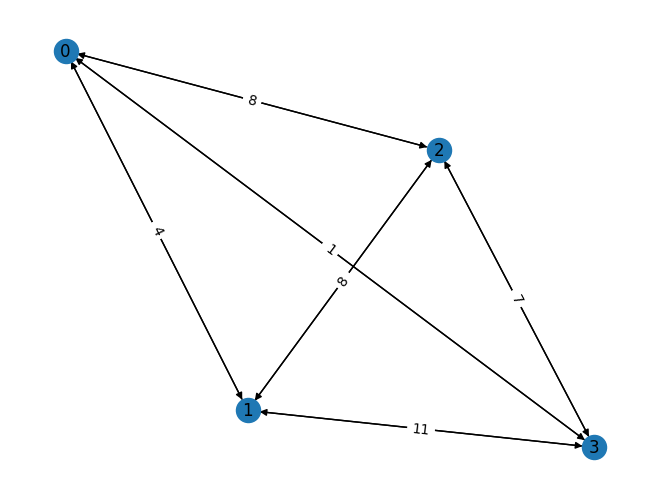

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

def display_graph(graph):
    g = nx.DiGraph()
    for node in graph:
        g.add_node(node)
        for neighbor, weight in graph[node]:
            g.add_edge(node, neighbor, weight=weight)

    pos = nx.spring_layout(g)
    nx.draw(g, pos, with_labels=True)
    edge_labels = nx.get_edge_attributes(g, 'weight')
    nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels)
    plt.show()

matrix = [
    [0, 4, 8, 1],
    [4, 0, 8, 11],
    [8, 8, 0, 7],
    [1, 11, 7, 0]
]

graph = build_graph(matrix)
display_graph(graph)